# Linear Regression Example

In [1]:
import sys
sys.path.append('../../MachineLearningPackage/')

In [2]:
from load_data import LoadData
from graph_view import GraphView
from linear_regression import LinearRegression
from split_data import SplitData
import numpy as np

In [3]:
dataset = LoadData('../tests/datasets', 'HealthInsurance.csv')

In [4]:
data = dataset.load_csv()

In [5]:
data.describe()

,idade,custo
count,10.000000,10.000000
mean,40.500000,1946.700000
std,15.138252,1006.071353
min,18.000000,871.000000
25%,29.250000,1270.500000
50%,40.500000,1563.000000
75%,51.750000,2373.000000
max,63.000000,4090.000000


In [6]:
split = SplitData(data)

In [7]:
data_train, data_test, data_val = split.split_train_test_val(0.2, 0.2)

In [8]:
print(data_train.size)
print(data_test.size)
print(data_val.size)

12
4
4


In [9]:
data_train = dataset.convert_numpy_array(data_train)
data_test = dataset.convert_numpy_array(data_test)
data_val = dataset.convert_numpy_array(data_val)

In [10]:
X, y = np.atleast_2d(data_train[:, 0]).T, data_train[:, 1]
Xtest, ytest = np.atleast_2d(data_test[:, 0]).T, data_test[:, 1]
Xval, yval = np.atleast_2d(data_val[:, 0]).T, data_val[:, 1]

In [11]:
dataset_graph = GraphView(X, y)

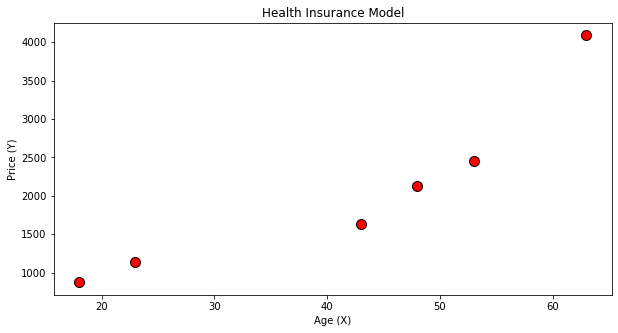

In [12]:
dataset_graph.linear_regression_data('Age (X)', 'Price (Y)', 'Health Insurance Model')

In [13]:
regressor = LinearRegression(X, y)

In [14]:
optimize_values = regressor.trainLinearReg()

In [15]:
optimize_values.fun

90074.87517157017

In [16]:
optimize_values.x

array([-456.76894965,   60.70809587])

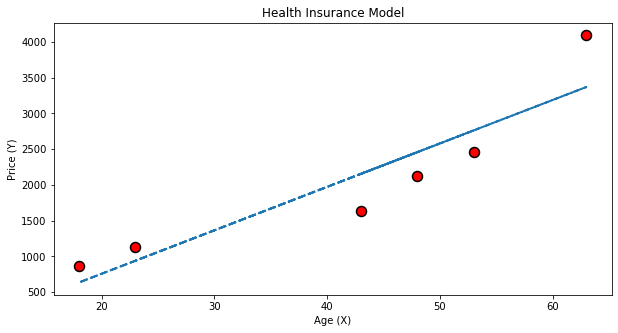

In [17]:
dataset_graph.model_linear('Age (X)', 'Price (Y)', 'Health Insurance Model')

In [18]:
train_error, val_error = regressor.learningCurve(Xval, yval)

In [19]:
print('# Training Examples\tTraining Error\t\tCross Validation Error')
for i in range(y.size):
    print('{}\t\t\t{}\t{}'.format(i+1, train_error[i], val_error[i]))

# Training Examples	Training Error		Cross Validation Error
1			0.0	36940.81928830052
2			8.989583401318135e-08	38873.16236739505
3			85395.26914962499	23705.71708871625
4			113353.65225130785	2816.304894787874
5			102046.88303494484	2525.321317419959
6			90074.87517157017	1.0016815369016137


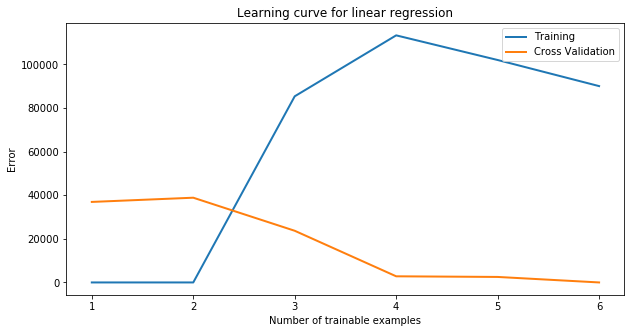

In [20]:
dataset_graph.learning_curve_linear(Xval, yval)

In [21]:
pred = regressor.predict(Xtest)

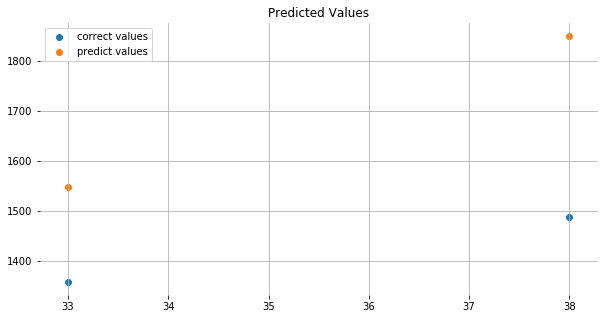

In [22]:
dataset_graph.predicted_values(Xtest, ytest, pred)

In [23]:
J, grad = regressor.normal_equation()

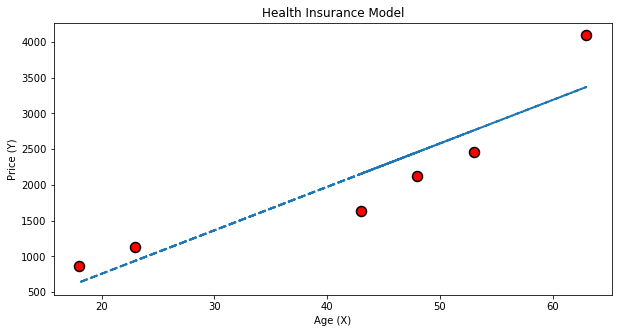

In [24]:
dataset_graph.model_linear_normal_equation('Age (X)', 'Price (Y)', 'Health Insurance Model')

In [25]:
pred_NE = regressor.predict_normal_equation(Xtest)

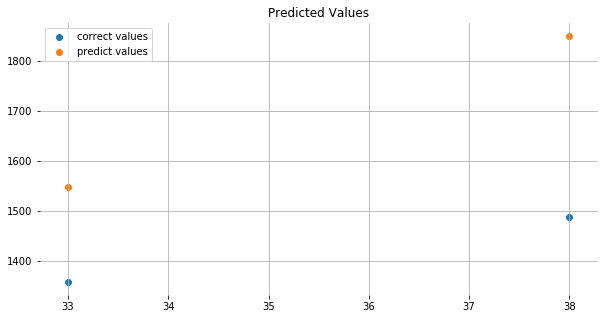

In [26]:
dataset_graph.predicted_values(Xtest, ytest, pred_NE)